In [1]:
!pip install plotly


  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("./datasets/Advertising.csv")

### EDA

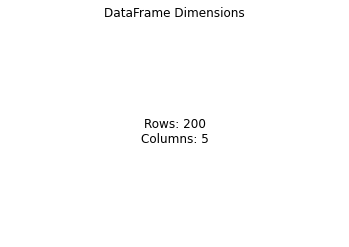

In [4]:
rows, columns = data.shape
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Rows: {rows}\nColumns: {columns}', fontsize=12, ha='center', va='center')
plt.axis('off')
plt.title('DataFrame Dimensions')
plt.show()

In [5]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


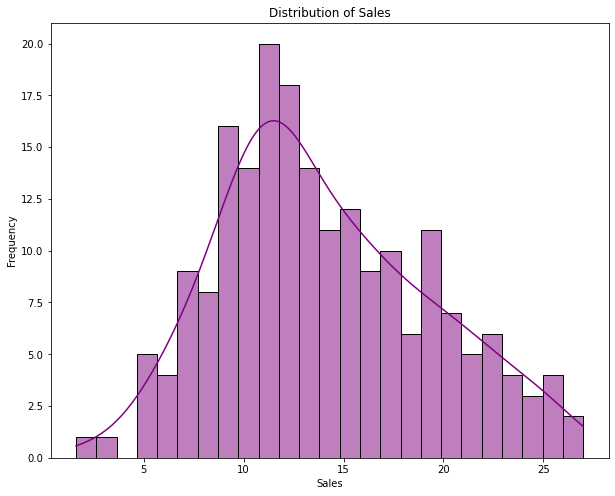

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(data['Sales'], bins=25, kde=True, 
             color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


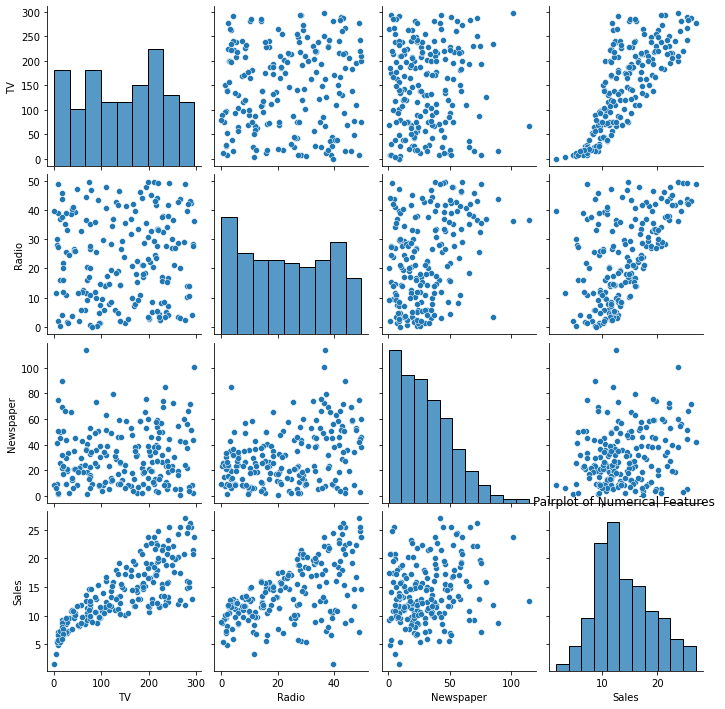

In [17]:
# Pairplot to visualize relationships between numerical features

sns.pairplot(data, vars=['TV', 'Radio', 'Newspaper', 'Sales'],)
plt.title('Pairplot of Numerical Features ')
plt.show()


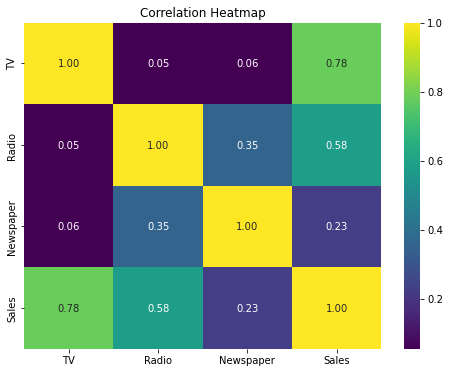

In [18]:
# Correlation heatmap

plt.figure(figsize=(8, 6))
correlation_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

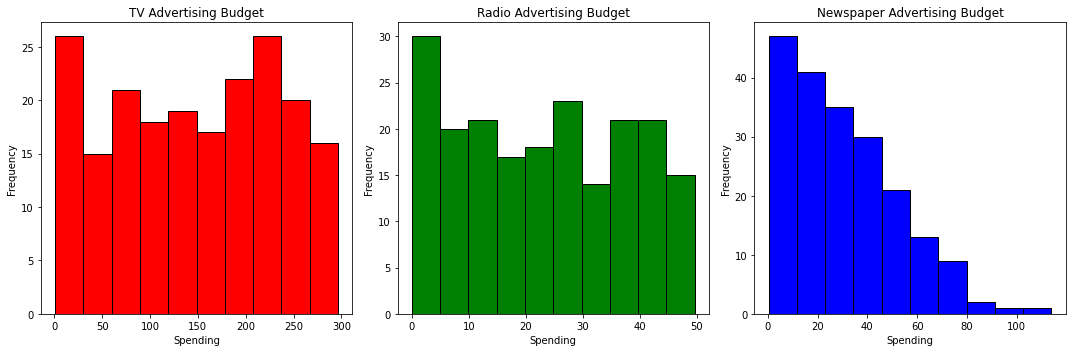

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["TV"].plot.hist(ax=axes[0], bins=10, color='red', edgecolor='black')
axes[0].set_title('TV Advertising Budget')
axes[0].set_xlabel('Spending')
axes[0].set_ylabel('Frequency')

data["Radio"].plot.hist(ax=axes[1], bins=10, color='green', edgecolor='black')
axes[1].set_title('Radio Advertising Budget')
axes[1].set_xlabel('Spending')
axes[1].set_ylabel('Frequency')

data["Newspaper"].plot.hist(ax=axes[2], bins=10, color='blue', edgecolor='black')
axes[2].set_title('Newspaper Advertising Budget')
axes[2].set_xlabel('Spending')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### MODELING

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[["TV"]], data[["Sales"]], test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [23]:
predictions = model.predict(x_test)

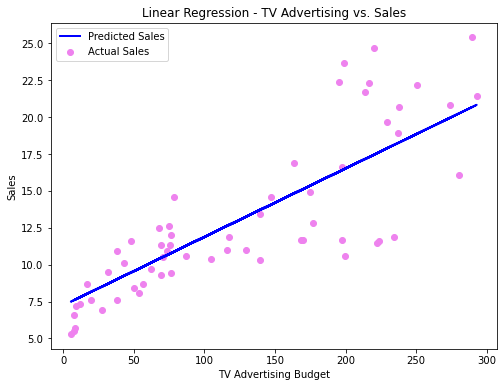

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='violet', label='Actual Sales')
plt.plot(x_test, predictions, color='blue', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()